# CREDIT RISK Analytics

#### Supress warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Import Library

In [3]:
import pandas as pd
import numpy as np

#### Read data into a Dataframes

In [4]:
train_data=pd.read_csv(r'C:\Users\Priyanka Sawant\PGAML&DAClass\Machine Learning\Class Prac\SVM\risk_analytics_train.csv',index_col=0,header=0)
test_data=pd.read_csv(r'C:\Users\Priyanka Sawant\PGAML&DAClass\Machine Learning\Class Prac\SVM\risk_analytics_test.csv',index_col=0,header=0)

#### Print shape & top 5 records of train Dataset

In [5]:
print(train_data.shape)
train_data.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Print shape & top 5 records of test Dataset

In [6]:
print(test_data.shape)
test_data.head()

(367, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Check Missing Values

In [7]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


We can notice that there are missing values in train & test dataset.

#### Print Columns of train Dataset

In [8]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Replace missing value with mode value on train & test dataset

In [9]:
colname1=['Gender', 'Married', 'Dependents', 'Self_Employed','Loan_Amount_Term']
for x in colname1:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)

#### Check Missing Values

In [10]:
print(train_data.isnull().sum())

print('----------------------------------')
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
----------------------------------
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


We can see column name with 'Gender', 'Married', 'Dependents', 'Self_Employed','Loan_Amount_Term' are replaced

#### Inputing numerical missing data with mean value on train & test dataset & check missing value

In [11]:

train_data["LoanAmount"].fillna(round(train_data["LoanAmount"].mean(),0),
                               inplace=True)
test_data["LoanAmount"].fillna(round(test_data["LoanAmount"].mean(),0),
                               inplace=True)

print(train_data.isnull().sum())

print('----------------------------------')
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
----------------------------------
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


#### Filling Remaining column with mode value on train & test dataset

In [12]:
train_data.Credit_History.mode()   #filling value with 0

#train_data[value].fillna(train_data[value].mode()[0],inplace=True)

0    1.0
dtype: float64

In [13]:
#Inputing values for credit_history col differently

train_data["Credit_History"].fillna(value=0,
                               inplace=True)
test_data["Credit_History"].fillna(value=0,
                               inplace=True)

print(train_data.isnull().sum())

print('----------------------------------')
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
----------------------------------
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### Check train dataset Datatypes 

In [14]:
train_data.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Transforming categorical data to numerical  for train dataset

In [15]:
from sklearn.preprocessing import LabelEncoder

colname=['Gender', 'Married','Education', 'Self_Employed','Property_Area', 'Loan_Status']

le=LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])




#### Display top 5 records of train dataset

In [16]:
train_data.head()
#converted Loan status as Y----> & N-->0

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### Display test dataset columns

In [17]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### Transforming categorical data to numerical  for test dataset

In [18]:
from sklearn.preprocessing import LabelEncoder

colname=['Gender', 'Married','Education', 'Self_Employed','Property_Area']

le=LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])




#### Display top 5 records of train dataset

In [19]:
train_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


The data cleaning of train & test dataset is done. 

#### EDA - Heatmap

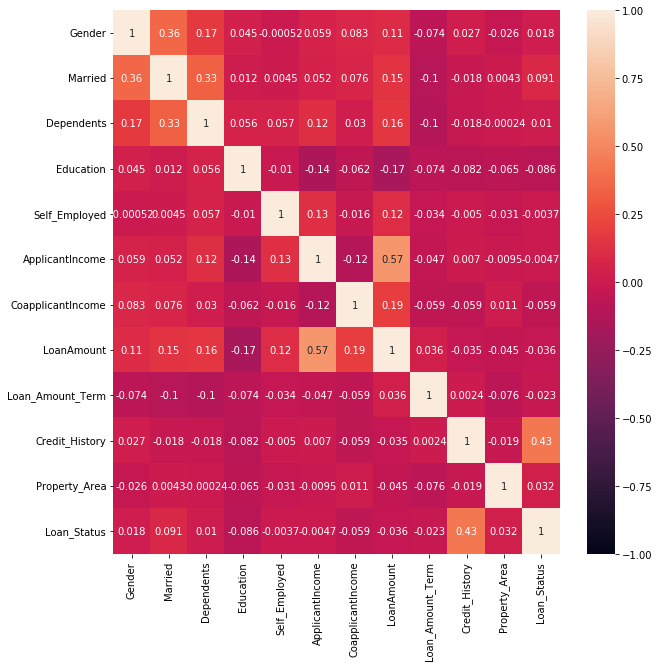

In [20]:
corr_df=train_data.corr()
#print(corr_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()


#independehnt var not correlated to each other --good
#credit_hostory=0-1 i.e increaing than loan= increasing

#### Creating training, testing dataset & running the model

In [21]:
X_train=train_data.values[:,0:-1]
Y_train=train_data.values[:,-1]

#convert Y_train datatype into int
Y_train=Y_train.astype(int)

#### Display shape

In [22]:
print(X_train.shape)
print(Y_train.shape)

(614, 11)
(614,)


#### Create X variable of test dataset

In [23]:
#test_data.head()
X_test=test_data.values[:,:]


#### Display shape

In [24]:
X_test.shape

(367, 11)

#### Standardizing

In [25]:
from sklearn.preprocessing import StandardScaler

#create a model object
scaler=StandardScaler()


#train the model object
scaler.fit(X_train)   #we do fitting on majority of data i.e train
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test) 

In [26]:
print(X_train)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]]


#### Model Building

In [27]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))


[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

#### Run model

In [28]:
svc_model.score(X_train,Y_train)


0.7768729641693811

We can see that 77% accuracy.

#### Print Metrics

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred_new=svc_model.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[ 97  95]
 [ 42 380]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       192
           1       0.80      0.90      0.85       422

    accuracy                           0.78       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.77      0.78      0.77       614



#### Read Test dataset 

In [30]:
test_data=pd.read_csv(r'C:\Users\Priyanka Sawant\PGAML&DAClass\Machine Learning\Class Prac\SVM\risk_analytics_test.csv',header=0)
test_data["Y_predictions"]=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


Insert Y_Predictions Column in above datset & store the Y_pred value of trained model.

#### Replace Input Values of Y_Predictions Column

In [31]:
test_data["Y_predictions"]=test_data["Y_predictions"].replace({1:"Eligible",
                                                              0:"Not Eligible"})

#### Display top 5 records

In [32]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Not Eligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


#### Save test dataset in excel format in sysytem.

In [33]:
test_data.to_excel(r'test_data_output.xlsx',index=False)


#### Display Counts of Predicated value

In [34]:
test_data.Y_predictions.value_counts()

Eligible        280
Not Eligible     87
Name: Y_predictions, dtype: int64

#### Perform Tunning process

#### Cross Validationm

In [35]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
 
#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) #75.89%
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') #75.07%
#classifier=svm.SVC(kernel='sigmoid',C=8,gamma=0.01) #77.03%
#classifier=svm.SVC(kernel='rbf',C=130.0,gamma=0.1) #77.03%
classifier=LogisticRegression() #77.20%
#classifier=svm.SVC(kernel='linear',C=10,gamma=0.01) #77.03%
 
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


[0.77419355 0.82258065 0.74193548 0.72580645 0.7704918  0.68852459
 0.80327869 0.7704918  0.78688525 0.83606557]
0.772025383395029


#### Grid Search Cross Validation

In [36]:
from sklearn import svm
 
svc_model = svm.SVC(kernel="rbf")
 
parameter_space = {
    #'kernel': ["linear","rbf","poly","sigmoid"],
    'gamma': [0.1,0.01,0.001],
    #"C": np.arange(0,101,5)
    'C': [1,5,8,10,20,30, 40,50,130]
    
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)

#### Train the model object

In [37]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20, 30, 40, 50, 130],
                         'gamma': [0.1, 0.01, 0.001]})

In [38]:
print('Best parameters found:\n',clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.01}


#### Accuracy of best parameter using the 5-fld CV

In [39]:
clf.best_score_  

0.7704118352658936

#### Accuracy of the best params on the train data

In [40]:
clf.score(X_train,Y_train)  


0.7768729641693811

In [41]:
Y_pred=clf.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [42]:
Y_pred.sum()

280

#### Import pickle library

In [44]:
import pickle

#### Save  model to the disk

In [ ]:
filename=r'svc_model.sav'
pickle.dump(svc_model,open(filename,'wb')) #write byte=wb

#### Load the model from disk

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred=loaded_model.predict(X_test)
Y_pred